This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the присутствие of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
link: https://archive.ics.uci.edu/dataset/45/heart+disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
# !pip install ydata_profiling
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('heart+disease/processed.cleveland.data', sep=',')
df.columns = ['age',        # Age
                'sex',        # Sex
                'cp',         # Chest pain type
                'trestpbs',   # Resting blood pressure
                'chol',       # Serum cholestoral in mg/dl
                'fbs',        # Fasting blood sugar > 120 mg/dl (boolean)
                'restecg',    # Resting electrocardiographic results
                'thalach',    # Maximum heartrate achieved
                'exang',      # Exercise induced angina
                'oldpeak',    # ST depression induced by exercise relative to rest
                'slope',      # The slope of the peak exercise ST segment
                'ca',         # Number of major vessels
                'thal',       # Normal / fixed defect / reversable defect
                'class',      # Diagnosis of heart disease ( No presence 0 - 4 Very likely ) --> 0 or 1
                ]

In [3]:
df

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
df['class'].value_counts()

class
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64

### Simplify target column

In [5]:
# df['class'] = df['class'].apply(lambda x: 0 if x == True else False)
df2 = df.copy()
# df['class'] = df['class'].apply(lambda x: 0 if x == 0 else 1)
df['class'] = df['class'].apply(lambda x: 0 if x == 0.0 else 1.0)

In [6]:
df['class'].value_counts()

class
0.0    163
1.0    139
Name: count, dtype: int64

In [7]:
df.head(10)

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1.0
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1.0
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0.0


In [8]:
df.tail()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1.0
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1.0
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0.0


In [9]:
df['ca'].values

array(['3.0', '2.0', '0.0', '0.0', '0.0', '2.0', '0.0', '1.0', '0.0',
       '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '2.0', '2.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '2.0', '2.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '1.0', '1.0', '0.0', '3.0', '0.0', '2.0', '0.0', '0.0', '1.0',
       '0.0', '0.0', '1.0', '0.0', '1.0', '0.0', '1.0', '0.0', '1.0',
       '1.0', '1.0', '0.0', '1.0', '1.0', '0.0', '0.0', '3.0', '0.0',
       '1.0', '2.0', '0.0', '0.0', '0.0', '0.0', '0.0', '2.0', '2.0',
       '2.0', '1.0', '0.0', '1.0', '1.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '3.0', '3.0', '0.0', '0.0', '1.0', '1.0', '2.0', '1.0', '0.0',
       '0.0', '0.0', '1.0', '1.0', '3.0', '0.0', '1.0', '1.0', '1.0',
       '0.0', '0.0', '1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0',
       '3.0', '1.0', '2.0', '3.0', '0.0', '0.0', '1.0', '0.0', '2.0',
       '1.0', '0.0',

In [10]:
df = df[(df.astype(str) != '?').all(axis=1)]

In [11]:
df.tail()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1.0
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1.0
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1.0
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0


In [12]:
df.shape

(296, 14)

In [13]:
df['class'].value_counts()

class
0.0    159
1.0    137
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    float64
 1   sex       296 non-null    float64
 2   cp        296 non-null    float64
 3   trestpbs  296 non-null    float64
 4   chol      296 non-null    float64
 5   fbs       296 non-null    float64
 6   restecg   296 non-null    float64
 7   thalach   296 non-null    float64
 8   exang     296 non-null    float64
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    float64
 11  ca        296 non-null    object 
 12  thal      296 non-null    object 
 13  class     296 non-null    float64
dtypes: float64(12), object(2)
memory usage: 34.7+ KB


In [15]:
df.describe(include='all')

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296,296,296.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173,164,NaN
mean,54.513514,0.675676,3.165541,131.648649,247.398649,0.141892,0.993243,149.597973,0.327703,1.051351,1.597973,NaN,NaN,0.462838
std,9.051631,0.468915,0.958262,17.775956,52.078915,0.349530,0.994879,22.980401,0.470171,1.165841,0.613848,NaN,NaN,0.499461
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.250000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,1.000000


In [16]:
ProfileReport(df, title='Heart Disease Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, 
              interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, 
              missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [17]:
df.head(), '\n', df.describe(include='all')

(    age  sex   cp  trestpbs   chol  fbs  restecg  thalach  exang  oldpeak  \
 0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
 1  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
 2  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
 3  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
 4  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
 
    slope   ca thal  class  
 0    2.0  3.0  3.0    1.0  
 1    2.0  2.0  7.0    1.0  
 2    3.0  0.0  3.0    0.0  
 3    1.0  0.0  3.0    0.0  
 4    1.0  0.0  3.0    0.0  ,
 '\n',
                age         sex          cp    trestpbs        chol  \
 count   296.000000  296.000000  296.000000  296.000000  296.000000   
 unique         NaN         NaN         NaN         NaN         NaN   
 top            NaN         NaN         NaN         NaN         NaN   
 freq           NaN         NaN         NaN         NaN         

In [18]:
object_columns = df.select_dtypes(include=['object']).columns
[print(col_name, ":", df[col].unique()) for col, col_name in zip(df[object_columns], object_columns)]

ca : ['3.0' '2.0' '0.0' '1.0']
thal : ['3.0' '7.0' '6.0']


[None, None]

In [19]:
df['thal'] = df['thal'].astype(float)
df['ca'] = df['ca'].astype(float)

In [20]:
df['class'].value_counts()

class
0.0    159
1.0    137
Name: count, dtype: int64

In [21]:
# pd.isna(df).sum()

In [22]:
# dub_df=df.copy()
# dub_df.drop_duplicates(subset=None,inplace=True)

In [23]:
# dub_df.shape

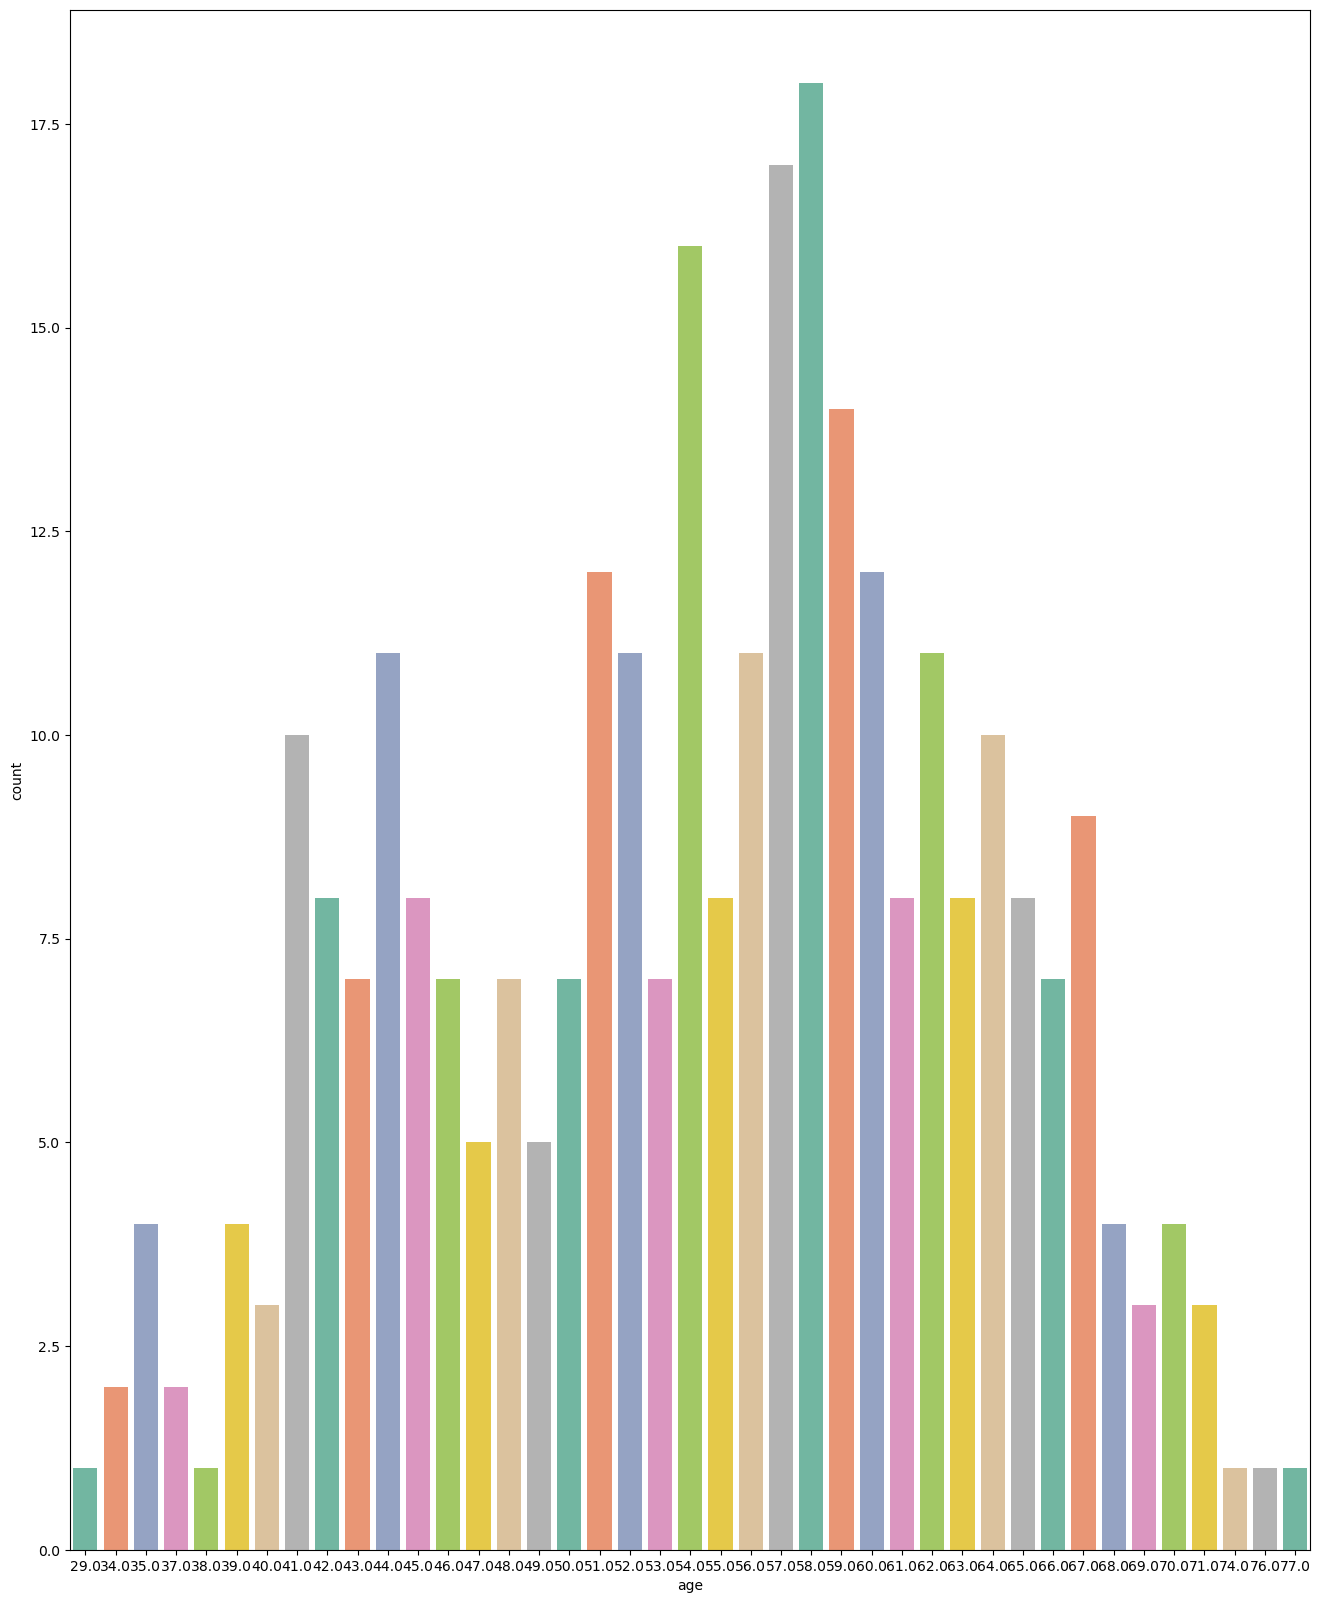

In [24]:
plt.figure(figsize=(16,20))
sns.countplot(x='age', data=df, palette="Set2")
plt.show()

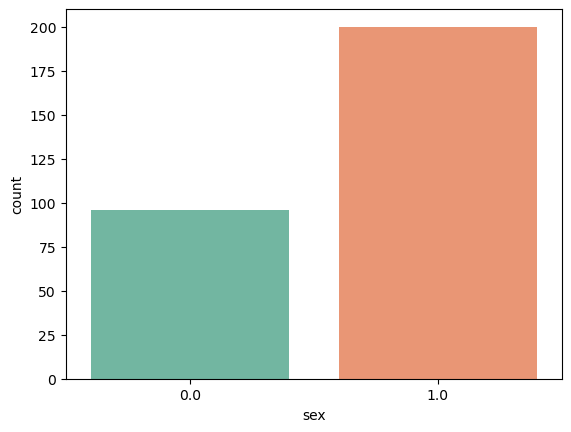

In [25]:
sns.countplot(x='sex', data=df, palette='Set2')
plt.show()

### Target column exploration

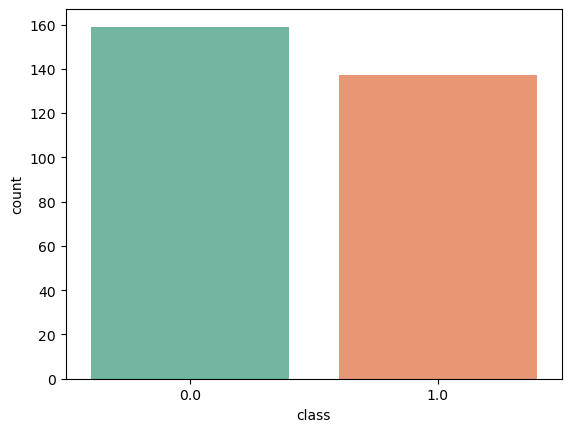

In [26]:
sns.countplot(x='class', data=df, palette='Set2')
plt.show()

In [27]:
negative_vals, positive_vals = df['class'].value_counts()
ratio = negative_vals/positive_vals
print(ratio)
print('negative: ', negative_vals)
print('positive: ', positive_vals)

1.1605839416058394
negative:  159
positive:  137


### Correlation HeatMap

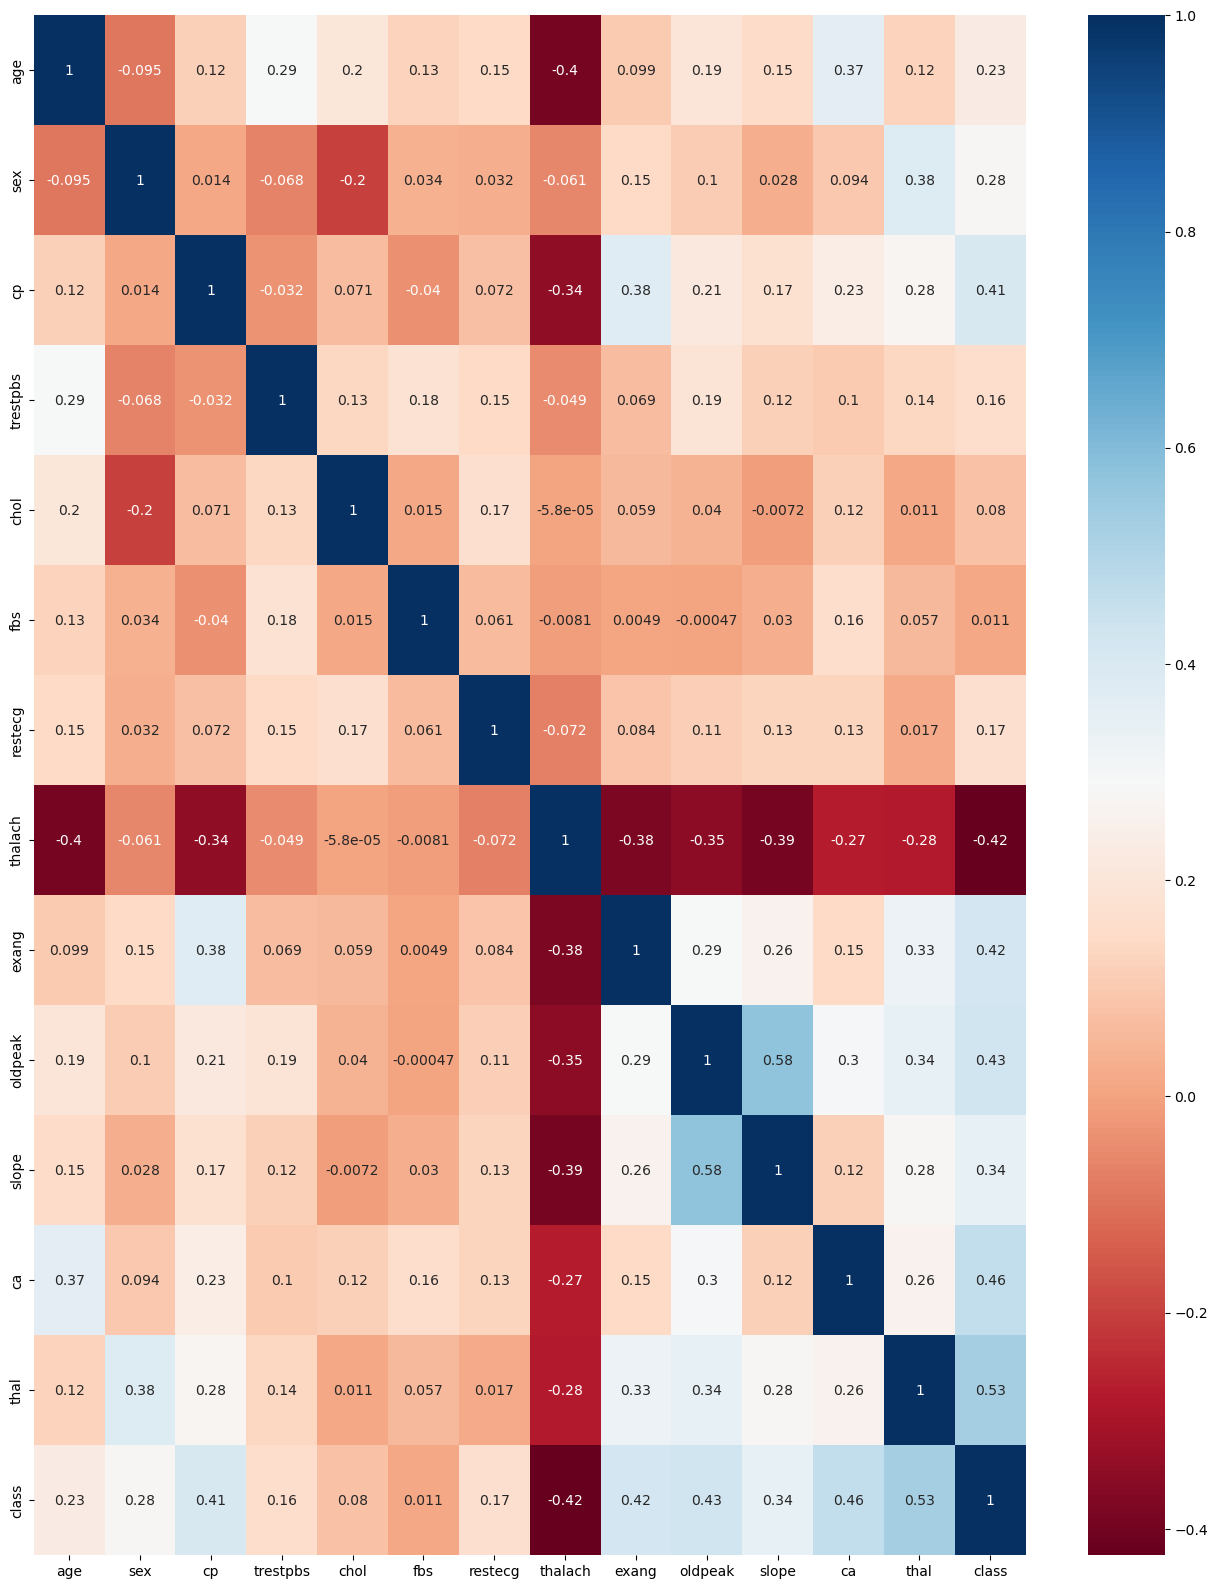

In [28]:
plt.figure(figsize=(16,20))
sns.heatmap(df.corr(), annot=True,cmap='RdBu')
plt.show()

According to the correlation between variables, it can be seen that chest pain type, exercise induced angina(exang), ST depression induced by exercise relative to rest(oldpeak), the slope of the peak exercise ST segment(slope), number of major vessels (0-3) colored by flourosopy(ca) and thalassemia(thal) have a high positive correlation with the target variable. However, max. heart rate(thalach) negatively correlate with the target variable.

Skewness is between -0.5 and 0.5, the distribution is approximately symmetric

### Training our Machine Learning Model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay #plot_confusion_matrix,
from sklearn.metrics import recall_score, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [30]:
def score_summary(names, classifiers):

    cols = ["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_list = []
    
    for name, clf in zip(names, classifiers):        
        clf.fit(X_train, y_train)
        
        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)        
        roc_auc = auc(fpr, tpr)
        
        # conf mat
        cm = confusion_matrix(y_val, pred) 
        
        # recall: TP/(TP+FN)
        recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
        
        # precision: TP/(TP+FP)
        precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
        
        # F1: TP/(TP+FP)
        f1 = 2 * recall * precision / (recall + precision)

        data_list.append([name, accuracy * 100, roc_auc, recall, precision, f1])
    
    data_table = pd.DataFrame(data_list, columns=cols)
    
    return np.round(data_table.reset_index(drop=True), 2)



def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
   

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))

    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):
        clf.fit(X_train, y_train)
        disp = ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val, ax=ax)
        disp.plot(cmap='Blues', values_format='.4g')
        ax.set_title(names[i])
        i += 1

    plt.tight_layout()
    plt.show()

    
def roc_auc_curve(names, classifiers):
          
    plt.figure(figsize=(12, 8))   
        
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        
        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")

### split the data into train and test sets

This is where the models have default values 

In [31]:
seed = 0
test_size = 0.25

# features = df.columns[:-1]
features = df.iloc[:, :-1].columns


X = df[features]
y = df['class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)



names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net",
    "Extra Tree",
    "XGBoost"
]

classifiers = [
    LogisticRegression(max_iter=1000, random_state=seed),
    KNeighborsClassifier(8),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
    ExtraTreesClassifier(random_state=seed),
    XGBClassifier()
    

]


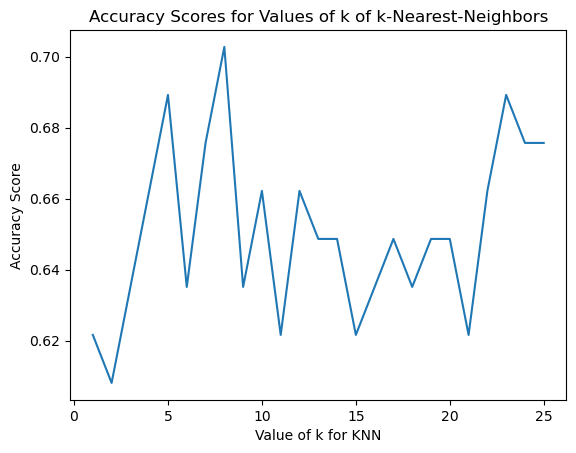

In [32]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    prediction_knn = model_knn.predict(X_val)
    scores.append(accuracy_score(y_val, prediction_knn))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [33]:

# score_summary(names, classifiers).sort_values(by='Accuracy' , ascending = False)\
# .style.background_gradient(cmap='coolwarm')\
# .bar(subset=["ROC_AUC",], color='#6495ED')\
# .bar(subset=["Recall"], color='#ff355d')\
# .bar(subset=["Precision"], color='lightseagreen')\
# .bar(subset=["F1"], color='gold')

### Summary without cross-val

In [34]:
summary_table = score_summary(names, classifiers).sort_values(by='Accuracy' , ascending=False)

styled_table = summary_table.style.background_gradient(cmap='coolwarm') \
    .bar(subset=["ROC_AUC"], color='#6495ED') \
    .bar(subset=["Recall"], color='#ff355d') \
    .bar(subset=["Precision"], color='lightseagreen') \
    .bar(subset=["F1"], color='gold')

styled_table

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
12,Extra Tree,87.840000,0.910000,0.790000,0.930000,0.850000
0,Logistic Regression,83.780000,0.900000,0.790000,0.840000,0.810000
8,Naive Bayes,83.780000,0.890000,0.760000,0.860000,0.810000
9,Linear DA,83.780000,0.910000,0.790000,0.840000,0.810000
11,Neural Net,83.780000,0.870000,0.760000,0.860000,0.810000
3,Nu SVC,82.430000,0.880000,0.790000,0.810000,0.800000
10,Quadratic DA,81.080000,0.850000,0.790000,0.790000,0.790000
5,Random Forest,79.730000,0.890000,0.700000,0.820000,0.750000
13,XGBoost,79.730000,0.870000,0.730000,0.800000,0.760000
6,AdaBoost,77.030000,0.880000,0.760000,0.740000,0.750000


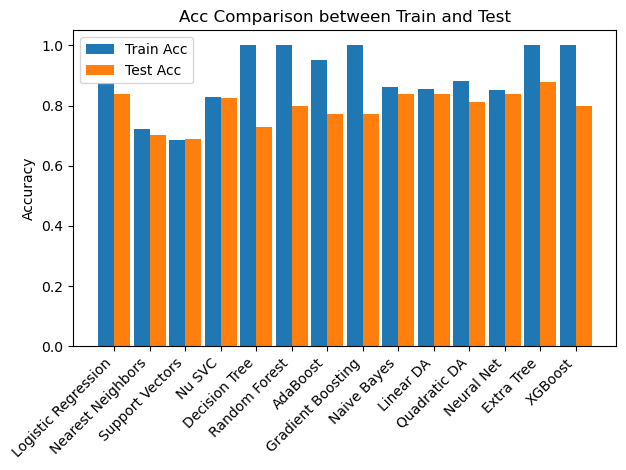

In [35]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


train_accuracies = []
test_accuracies = []


for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    test_pred = clf.predict(X_val)
    test_accuracy = accuracy_score(y_val, test_pred)
    test_accuracies.append(test_accuracy)

x = np.arange(len(names))
width = 0.45

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train Acc')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Acc')

ax.set_ylabel('Accuracy')
ax.set_title('Acc Comparison between Train and Test')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45, ha="right")
ax.legend()

fig.tight_layout()
plt.show()


We can see from the AUC graph that we only have three models very far behind:
KNN,
SVM,
Decision tree

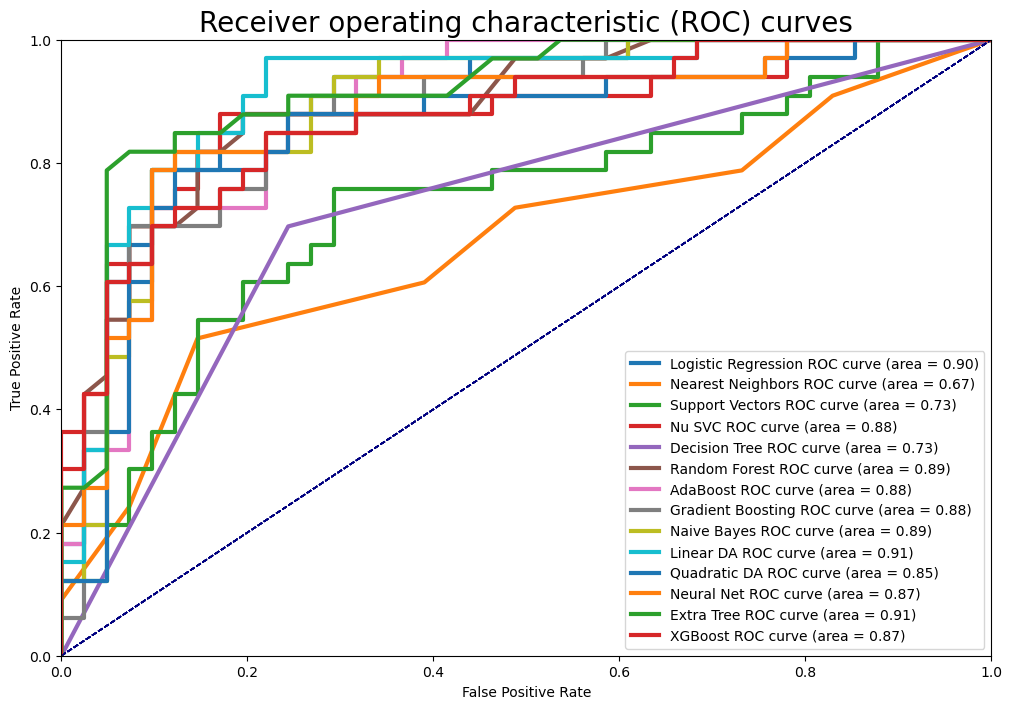

In [36]:
roc_auc_curve(names, classifiers)

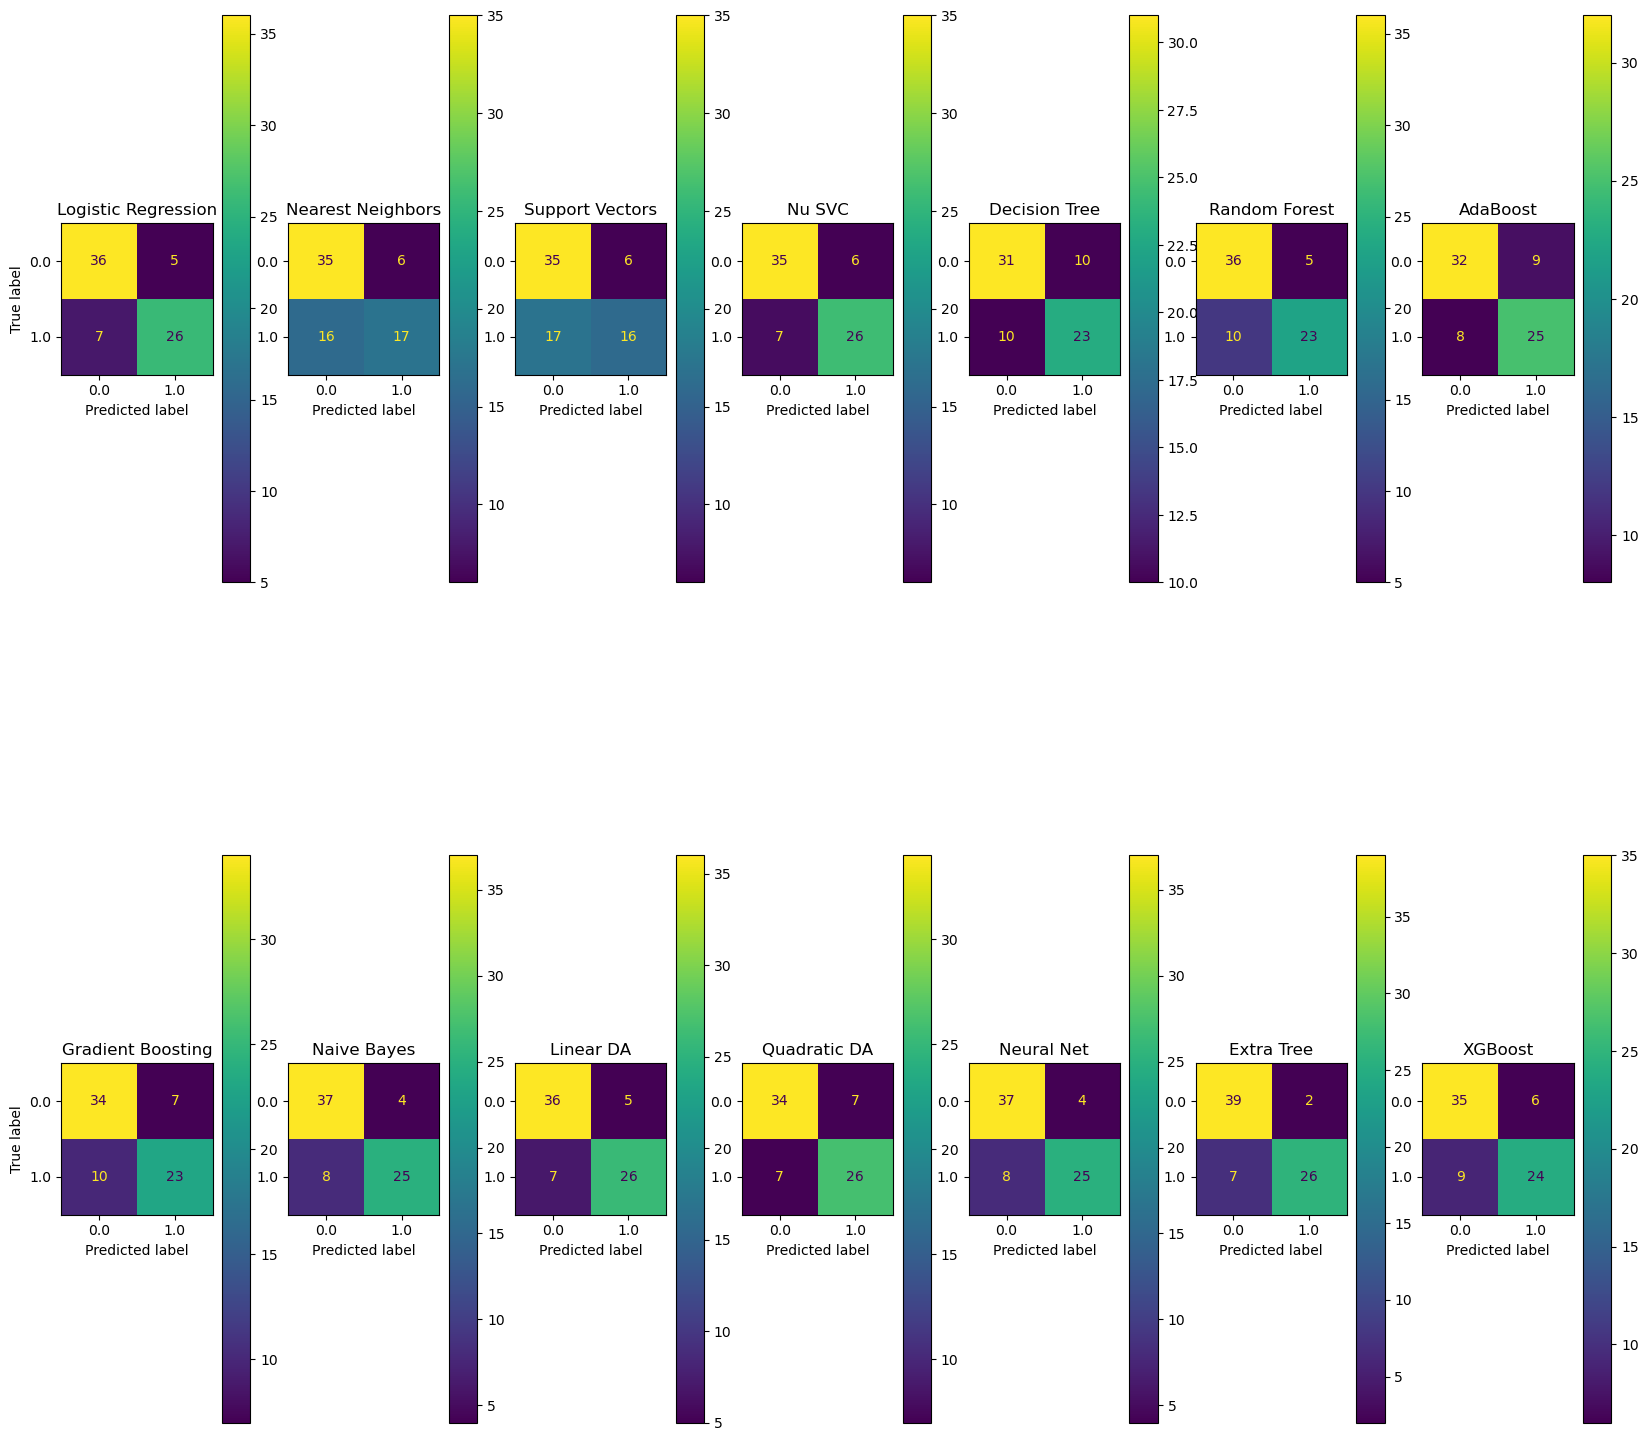

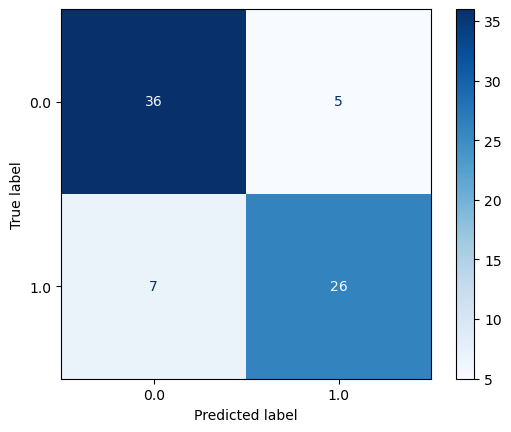

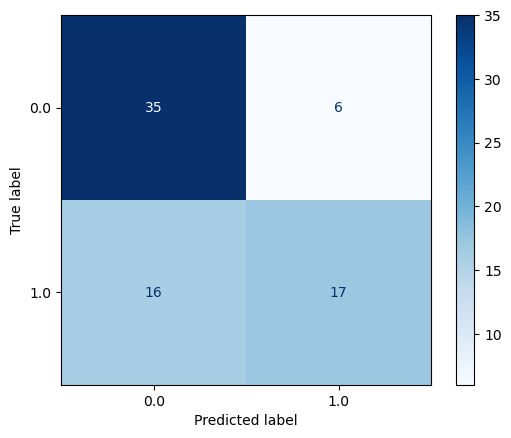

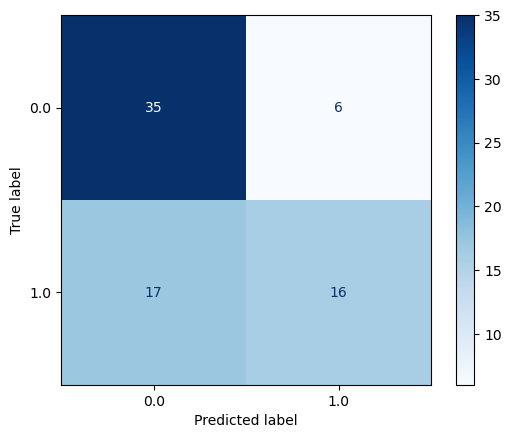

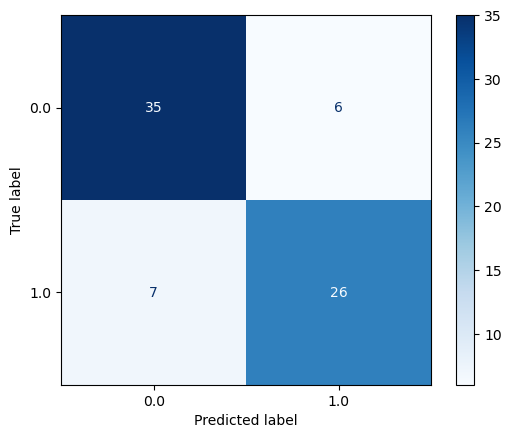

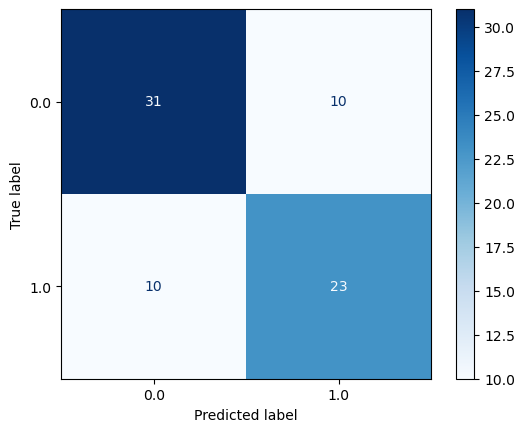

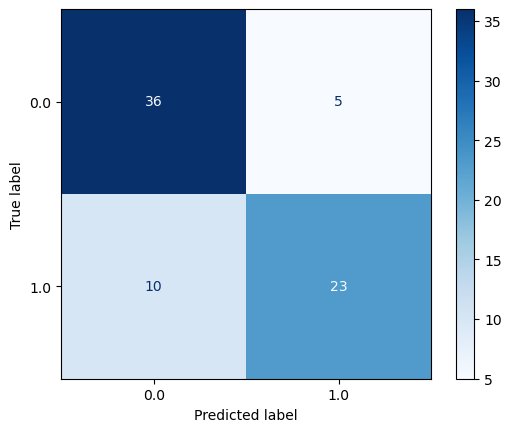

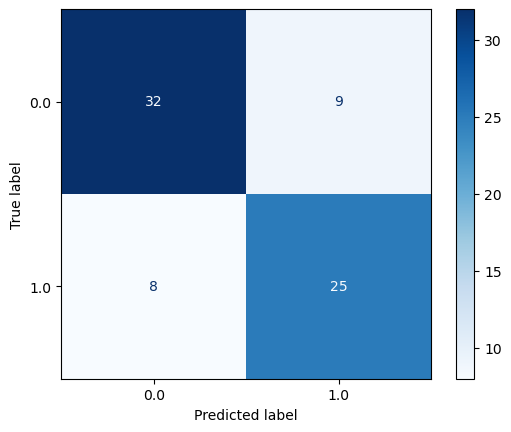

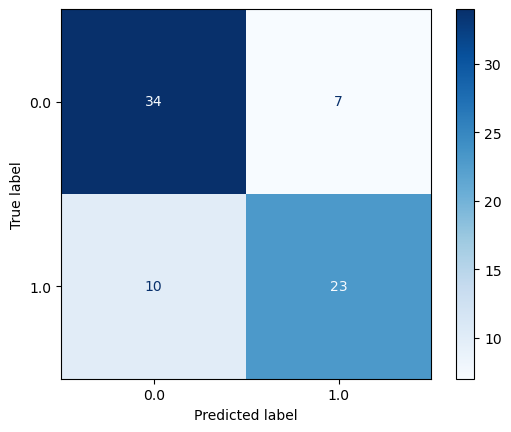

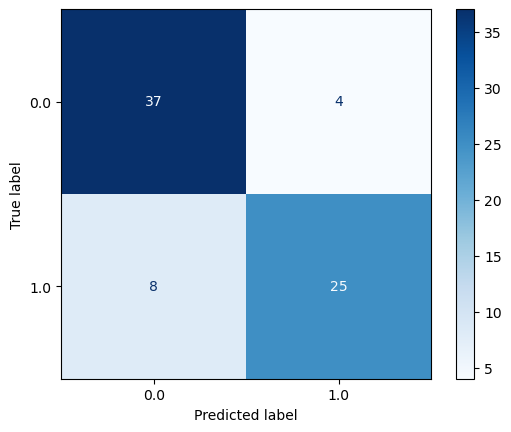

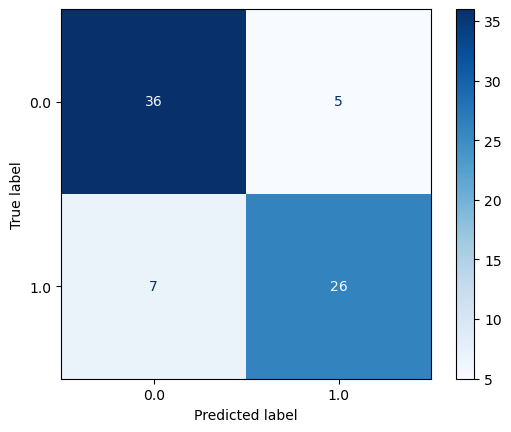

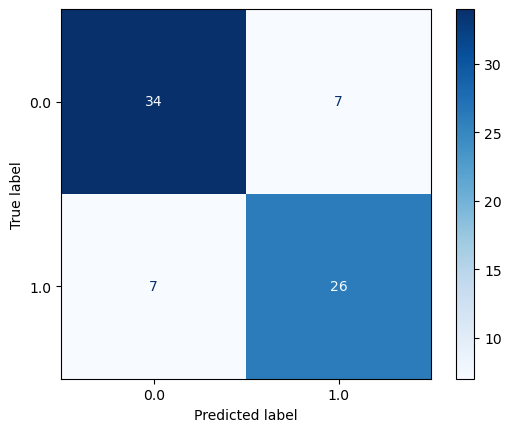

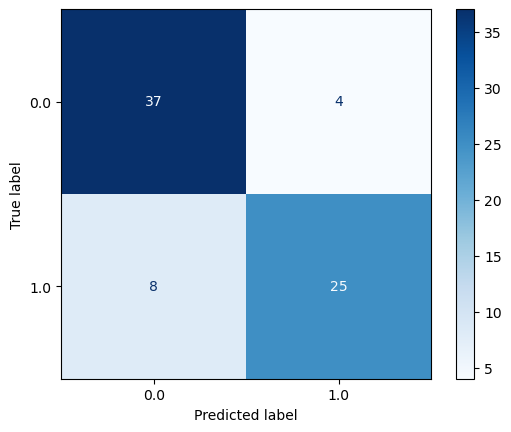

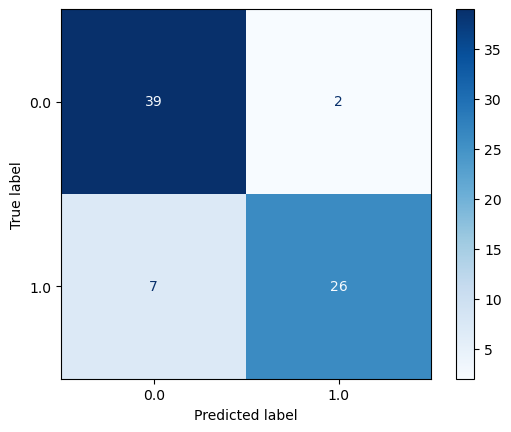

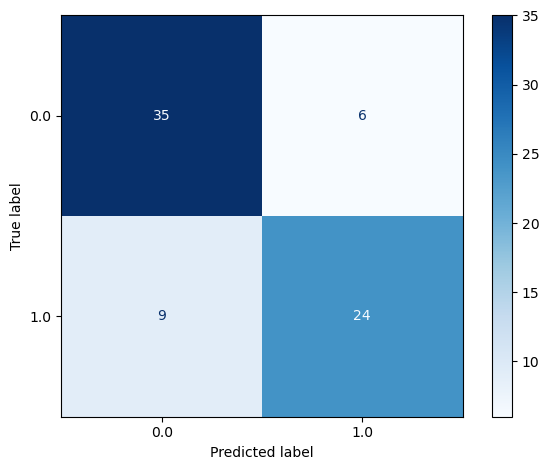

In [37]:
plot_conf_matrix(names, classifiers, nrows=2, ncols=7, fig_a=20, fig_b=20)

### Cross-Validation

My target column is skewed, because I have a coefficient of 1.161. And StratifiedKFold would be enough as a cross validation, but for curiosity I wanted to see how a regular KFold would show.
The class imbalance ratio is noticeable but not extreme

In [38]:
def score_summary_cv(names, classifiers, X, y, folds=5):

    
    cols = ["Classifier", "Accuracy (K-fold)", "ROC_AUC (K-fold)", "Recall (K-fold)", 
            "Precision (K-fold)", "F1 (K-fold)",
            "Accuracy (Stratified K-fold)", "ROC_AUC (Stratified K-fold)", 
            "Recall (Stratified K-fold)", "Precision (Stratified K-fold)", "F1 (Stratified K-fold)"]
    
    data_list = []
    
    kf = KFold(n_splits=folds, shuffle=True, random_state=0)
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
    
    for name, clf in zip(names, classifiers):        
        # K-fold cv
        kfold_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
        kfold_accuracy = np.mean(kfold_scores)
        
        kfold_cm = cross_val_score(clf, X, y, cv=kf, scoring='roc_auc')
        kfold_roc_auc = np.mean(kfold_cm)
        
        kfold_cm = cross_val_score(clf, X, y, cv=kf, scoring='recall')
        kfold_recall = np.mean(kfold_cm)
        
        kfold_cm = cross_val_score(clf, X, y, cv=kf, scoring='precision')
        kfold_precision = np.mean(kfold_cm)
        
        kfold_f1 = 2 * kfold_recall * kfold_precision / (kfold_recall + kfold_precision)
        
        # Strat K-fold cv
        skfold_scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
        skfold_accuracy = np.mean(skfold_scores)
        
        skfold_cm = cross_val_score(clf, X, y, cv=skf, scoring='roc_auc')
        skfold_roc_auc = np.mean(skfold_cm)
        
        skfold_cm = cross_val_score(clf, X, y, cv=skf, scoring='recall')
        skfold_recall = np.mean(skfold_cm)
        
        skfold_cm = cross_val_score(clf, X, y, cv=skf, scoring='precision')
        skfold_precision = np.mean(skfold_cm)
        
        skfold_f1 = 2 * skfold_recall * skfold_precision / (skfold_recall + skfold_precision)

        data_list.append([name, kfold_accuracy * 100, kfold_roc_auc, kfold_recall, kfold_precision, kfold_f1,
                          skfold_accuracy * 100, skfold_roc_auc, skfold_recall, skfold_precision, skfold_f1])
    
    data_table = pd.DataFrame(data_list, columns=cols)
    
    return np.round(data_table.reset_index(drop=True), 2)

summary_table_cv = score_summary_cv(names, classifiers, X, y, folds=5).sort_values(by='Accuracy (Stratified K-fold)', ascending=False)

styled_table_cv = summary_table_cv.style.background_gradient(cmap='coolwarm') \
    .bar(subset=["ROC_AUC (Stratified K-fold)"], color='#6495ED') \
    .bar(subset=["Recall (Stratified K-fold)"], color='#ff355d') \
    .bar(subset=["Precision (Stratified K-fold)"], color='lightseagreen') \
    .bar(subset=["F1 (Stratified K-fold)"], color='gold')

styled_table_cv

,Classifier,Accuracy (K-fold),ROC_AUC (K-fold),Recall (K-fold),Precision (K-fold),F1 (K-fold),Accuracy (Stratified K-fold),ROC_AUC (Stratified K-fold),Recall (Stratified K-fold),Precision (Stratified K-fold),F1 (Stratified K-fold)
8,Naive Bayes,83.440000,0.890000,0.800000,0.830000,0.820000,84.450000,0.900000,0.820000,0.850000,0.830000
9,Linear DA,82.760000,0.900000,0.780000,0.840000,0.810000,84.450000,0.900000,0.790000,0.860000,0.820000
0,Logistic Regression,82.420000,0.900000,0.780000,0.830000,0.810000,83.780000,0.900000,0.800000,0.840000,0.820000
5,Random Forest,81.070000,0.890000,0.790000,0.810000,0.800000,82.420000,0.900000,0.790000,0.830000,0.810000
12,Extra Tree,82.080000,0.900000,0.810000,0.820000,0.810000,81.070000,0.910000,0.820000,0.790000,0.800000
11,Neural Net,76.340000,0.880000,0.830000,0.720000,0.770000,80.740000,0.880000,0.750000,0.830000,0.790000
3,Nu SVC,80.070000,0.870000,0.750000,0.800000,0.780000,80.730000,0.880000,0.770000,0.810000,0.790000
10,Quadratic DA,79.720000,0.850000,0.760000,0.790000,0.780000,80.730000,0.880000,0.790000,0.800000,0.790000
6,AdaBoost,77.350000,0.850000,0.750000,0.760000,0.760000,79.720000,0.880000,0.770000,0.780000,0.780000
13,XGBoost,78.040000,0.860000,0.760000,0.770000,0.760000,79.050000,0.880000,0.750000,0.790000,0.770000


### Final


Earlier, I simplified my target column and at your instruction, I reverted it back. now the target column is multiclass, not binary

Here I used the grid serch parameters to improve my performance(metrics). Play with different kernel, n_estimators, etc. There is no main idea, inspiration, inference here of course).

In [39]:
df2.head()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [40]:
df2 = df2[(df2.astype(str) != '?').all(axis=1)]

In [41]:
df2.tail()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    float64
 1   sex       296 non-null    float64
 2   cp        296 non-null    float64
 3   trestpbs  296 non-null    float64
 4   chol      296 non-null    float64
 5   fbs       296 non-null    float64
 6   restecg   296 non-null    float64
 7   thalach   296 non-null    float64
 8   exang     296 non-null    float64
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    float64
 11  ca        296 non-null    object 
 12  thal      296 non-null    object 
 13  class     296 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.7+ KB


In [43]:
df2['thal'] = df2['thal'].astype(float)
df2['ca'] = df2['ca'].astype(float)

Here you can see that, with and without simplification of the target column, our correlation is slightly different, although not in extreme values.

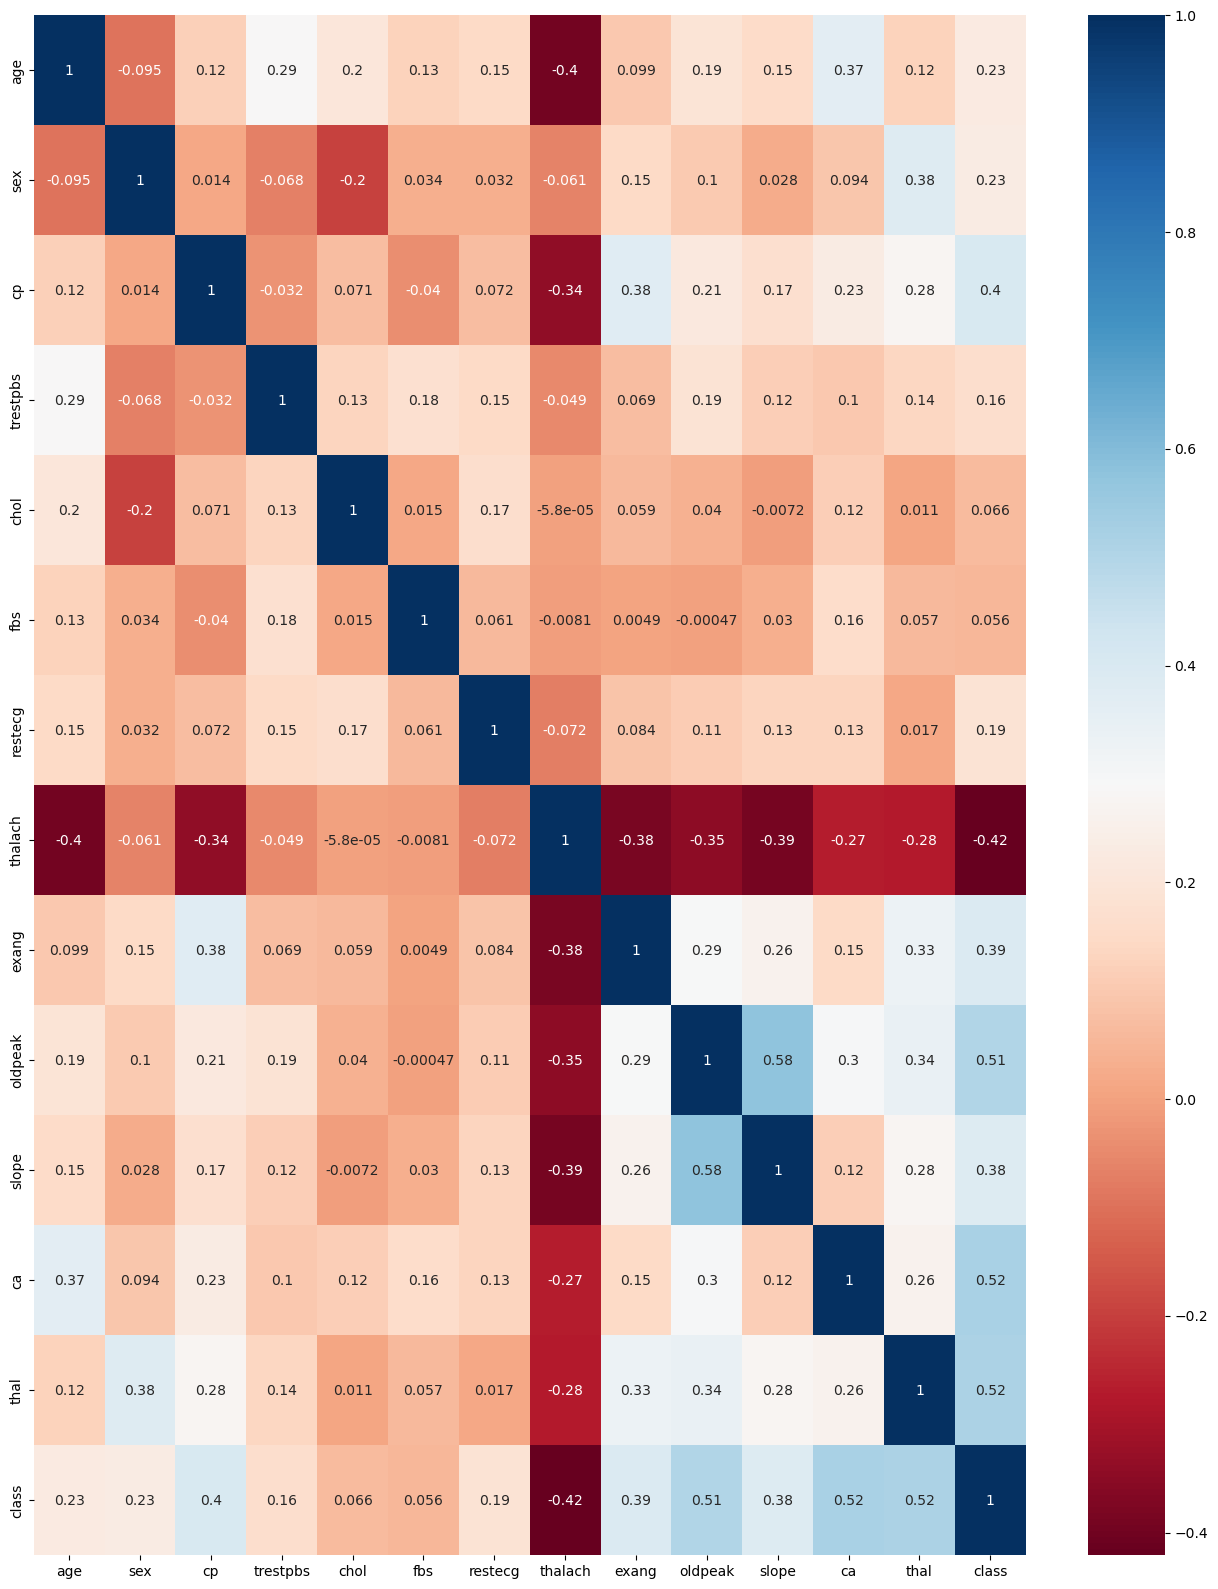

In [44]:
plt.figure(figsize=(16,20))
sns.heatmap(df2.corr(), annot=True,cmap='RdBu')
plt.show()

About the parameters looked up and took from this source https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
I also added SGD, which I hadn't used before on endterm.

In [81]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.linear_model import SGDClassifier


seed = 0
test_size = 0.25

features = df2.iloc[:, :-1].columns

X = df2[features]
y = df2['class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=seed)

kf = KFold(n_splits=5, shuffle=True, random_state=seed)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net",
    "Extra Tree",
    "XGBoost",
    "SGD"
]

classifiers = [
    LogisticRegression(random_state=seed),
    KNeighborsClassifier(),
    SVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
    ExtraTreesClassifier(random_state=seed),
    XGBClassifier(),
    SGDClassifier()
]

param_grids = [
    {'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    {'n_neighbors': [3, 5, 8, 10, 15], 'weights': ['uniform', 'distance']},
    {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']},
    {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion' : ["gini", "entropy"]},
    # {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'max_features' :['sqrt']},
    {},
    {},
    {},
    {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001, 0.01]},
    {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]},
    {'max_iter': [1000], 'tol' : [0.0001]}
]


In [58]:
results_table = []

for name, classifier, param_grid in zip(names, classifiers, param_grids):
    print(f"Training and testing {name}...")

    cv_results = cross_val_score(classifier, X_train, y_train, cv=kf, scoring='accuracy')
    train_accuracy = cv_results.mean()

    cv_results_stratified = cross_val_score(classifier, X_train, y_train, cv=skf, scoring='accuracy')
    train_accuracy_stratified = cv_results_stratified.mean()

    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

    y_pred = grid_search.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred, average='weighted')  # Choose the appropriate value
    precision = precision_score(y_val, y_pred, average='weighted')  # Choose the appropriate value
    conf_matrix = confusion_matrix(y_val, y_pred)


    results_table.append({
        'Classifier': name,
        'Train Accuracy (KFold)': train_accuracy,
        'Train Accuracy (Stratified KFold)': train_accuracy_stratified,
        'Validation Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'Confusion Matrix': conf_matrix
    })

import pandas as pd

results_df = pd.DataFrame(results_table)
print(results_df)

Training and testing Logistic Regression...
Best parameters: {'C': 10, 'solver': 'liblinear'}
Best cross-validation accuracy: 0.6086
Training and testing Nearest Neighbors...
Best parameters: {'n_neighbors': 15, 'weights': 'uniform'}
Best cross-validation accuracy: 0.5091
Training and testing Support Vectors...
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.6218
Training and testing Decision Tree...
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation accuracy: 0.5359
Training and testing Random Forest...
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation accuracy: 0.6036
Training and testing AdaBoost...
Best parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best cross-validation accuracy: 0.5768
Training and testing Gradient Boosting...
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_esti

As we can see the results are not particularly pleasing.

And here I didn't use beautiful tables because it was too big to add all this with the parameters of the grid search, it would be too big table 

In [83]:
X_train.head()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
159,46.0,1.0,2.0,101.0,197.0,1.0,0.0,156.0,0.0,0.0,1.0,0.0,7.0
90,62.0,0.0,4.0,160.0,164.0,0.0,2.0,145.0,0.0,6.2,3.0,3.0,7.0
291,44.0,1.0,4.0,120.0,169.0,0.0,0.0,144.0,1.0,2.8,3.0,0.0,6.0
157,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0
275,66.0,0.0,3.0,146.0,278.0,0.0,2.0,152.0,0.0,0.0,2.0,1.0,3.0


Here I have standardized some columns, as you can see, in the hope of improving performance and out of curiosity as to what the metrics would show in this case, and since they have a big impact unlike the other columns

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','trestpbs','chol','thalach','oldpeak']] = scaler.fit_transform(X_train[['age','trestpbs','chol','thalach','oldpeak']])
X_train.head()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
159,0.361702,1.0,2.0,0.066038,0.152425,1.0,0.0,0.648855,0.0,0.000000,1.0,0.0,7.0
90,0.702128,0.0,4.0,0.622642,0.076212,0.0,2.0,0.564885,0.0,1.000000,3.0,3.0,7.0
291,0.319149,1.0,4.0,0.245283,0.087760,0.0,0.0,0.557252,1.0,0.451613,3.0,0.0,6.0
157,0.659574,1.0,4.0,0.433962,0.374134,0.0,2.0,0.755725,0.0,0.193548,2.0,2.0,7.0
275,0.787234,0.0,3.0,0.490566,0.339492,0.0,2.0,0.618321,0.0,0.000000,2.0,1.0,3.0


In [85]:
X_val[['age','trestpbs','chol','thalach','oldpeak']] = scaler.fit_transform(X_val[['age','trestpbs','chol','thalach','oldpeak']])
X_val.head()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
233,0.465116,0.0,3.0,0.868421,0.320513,0.0,0.0,0.701031,0.0,0.000000,1.0,1.0,3.0
231,0.348837,1.0,3.0,0.315789,0.098291,0.0,2.0,0.319588,0.0,0.181818,1.0,3.0,3.0
12,0.232558,1.0,2.0,0.342105,0.585470,0.0,0.0,0.804124,0.0,0.000000,1.0,0.0,7.0
218,0.581395,1.0,4.0,0.578947,0.619658,0.0,2.0,0.896907,0.0,0.000000,1.0,0.0,3.0
268,0.186047,1.0,3.0,0.473684,0.230769,0.0,0.0,0.567010,0.0,0.000000,1.0,0.0,3.0


Log_Loss and/or mathew_corrcoef could have been used for an additional metric, but I didn't use it because I didn't really understand how these metrics work

In [86]:
results_table = []

for name, classifier, param_grid in zip(names, classifiers, param_grids):
    print(f"Training and testing {name}...")

    cv_results = cross_val_score(classifier, X_train, y_train, cv=kf, scoring='accuracy')
    train_accuracy = cv_results.mean()

    cv_results_stratified = cross_val_score(classifier, X_train, y_train, cv=skf, scoring='accuracy')
    train_accuracy_stratified = cv_results_stratified.mean()

    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

    y_pred = grid_search.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred, average='weighted')  # Choose the appropriate value
    precision = precision_score(y_val, y_pred, average='weighted')  # Choose the appropriate value
    conf_matrix = confusion_matrix(y_val, y_pred)


    results_table.append({
        'Classifier': name,
        'Train Accuracy (KFold)': train_accuracy,
        'Train Accuracy (Stratified KFold)': train_accuracy_stratified,
        'Validation Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'Confusion Matrix': conf_matrix
    })


results_df = pd.DataFrame(results_table)
print(results_df)

Training and testing Logistic Regression...
Best parameters: {'C': 10, 'solver': 'liblinear'}
Best cross-validation accuracy: 0.6084
Training and testing Nearest Neighbors...
Best parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy: 0.5543
Training and testing Support Vectors...
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.6125
Training and testing Decision Tree...
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation accuracy: 0.5359
Training and testing Random Forest...
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.6083
Training and testing AdaBoost...
Best parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best cross-validation accuracy: 0.5768
Training and testing Gradient Boosting...
Best parameters: {'learning_rate': 0.2, 'max_depth

If you don't simplify the target column to binary and leave it as is, the model is harder to train. As we can see accuracy and my other metrics did not reach the desired 90 percent

Conclusion, my approach is not perfect, has big holes in the project due to my lack of knowledge. And I'm not very satisfied with the result, but so far the achievement is like this. As we can see all the models on the results are not particularly different, especially among the models of good results here and not seen.

And yes I admit, with the parameters of grid serch, some points I vaguely understand, to be more precise not particularly clear, but still tried my best. 

Thank you for your attention